# Deformation Transfer

In [12]:
import numpy as np
try:
    from matplotrender.src.matplotrender import *
except:
    #!pip install git+https://github.com/chacorp/matplotrender.git
    from matplotrender import *
    
from utils.ict_face_model import ICT_face_model
from utils.util import *

# import meshplot as mp

## test

In [13]:
## loading blendshape
ict = ICT_face_model()
blendshapes = ict.exp_basis[:,:11248]
BS0 = 27
# BS0 = 26
BS1 = 5
print(blendshapes.shape)


tgt_mesh = EasyDict()
src_mesh = EasyDict()

print('loading meshes')

src_mesh.v, src_mesh.f = igl.read_triangle_mesh("data/source_restpose_mesh.obj")
print('\t src vertices:', src_mesh.v.shape, '\t faces:', src_mesh.f.shape) # (11248, 3) (22288, 3)

tgt_mesh.v, tgt_mesh.f = igl.read_triangle_mesh("data/target_restpose_mesh.obj")
print('\t tgt vertices:', tgt_mesh.v.shape, '\t faces:', tgt_mesh.f.shape) # (219, 11248, 3)

(53, 11248, 3)
loading meshes
	 src vertices: (11248, 3) 	 faces: (22288, 3)
	 tgt vertices: (3694, 3) 	 faces: (7007, 3)


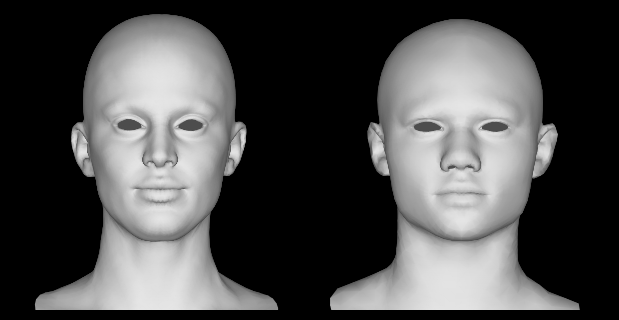

In [14]:
from matplotrender import *
# figure size
SIZE = 3
mesh_scale = .7

v_list=[ src_mesh.v, tgt_mesh.v]
f_list=[ src_mesh.f, tgt_mesh.f ]

# xyz Euler angle to rotate the mesh
rot_list=[ [0,0,0] ]*len(v_list)

plot_mesh_gouraud(v_list, f_list, 
                     # is_diff=True, diff_base=src_mesh.v, #diff_revert=True,
                     mesh_scale=mesh_scale,
                     rot_list=rot_list, size=SIZE, mode='shade')

In [4]:
# markers
src_m = np.array(
    [
        1225,  1888,  1052,   367,  1719,  1722,  2199,  1447,   966,
        3661,  4390,  3927,  3924,  2608,  3272,  4088,  3443,   268,
         493,  1914,  2044,  1401,  3615,  4240,  4114,  2734,  2509,
         978,  4527,  4942,  4857,  1140,  2075,  1147,  4269,  3360,
        1507,  1542,  1537,  1528,  1518,  1511,  3742,  3751,  3756,
        3721,  3725,  3732,  5708,  5695,  2081,     0,  4275,  6200,
        6213,  6346,  6461,  5518,  5957,  5841,  5702,  5711,  5533,
        6216,  6207,  6470,  5517,  5966, 10760, 11064, 10678, 10527,
        3607,  9584,  7571,  6844, 10295,  9461
    ]
)
tgt_m = np.array(
    [
        449,  475,  131,  114,  296,  649,  310,  551,  357, 1342, 1111,
       1438, 1096,  931,  949, 1263, 1253,  368,  379,  152,   40,  714,
       1497,  848,  969, 1176,  841,  361, 1618, 1723, 1707,  440,  745,
          3, 1231, 1229,  193,  384,  224,  337,  212,  326,  849, 1028,
       1070, 1002, 1125, 1018, 1931,   57,  742,    0, 1526,  865, 2049,
       2083, 2109, 2100, 1976, 1952, 1914, 1918, 1867, 2036, 2034, 2111,
       1863, 1973, 3523, 3641, 3473, 3422, 1322, 3301, 2684, 2174, 3361,
       3145
    ]
)

# np.array(src_m)

## Run

In [ ]:
mesh = corr_system(src_mesh, tgt_mesh, src_m, tgt_m, num_iter=1, Ws=1, Wi=0.001, Wc=0, Wm=1, show=False, mode=2)

In [8]:
# tgt_mesh.v = tgt_mesh.v - tgt_mesh.v.mean(0) + src_mesh.v.mean(0)

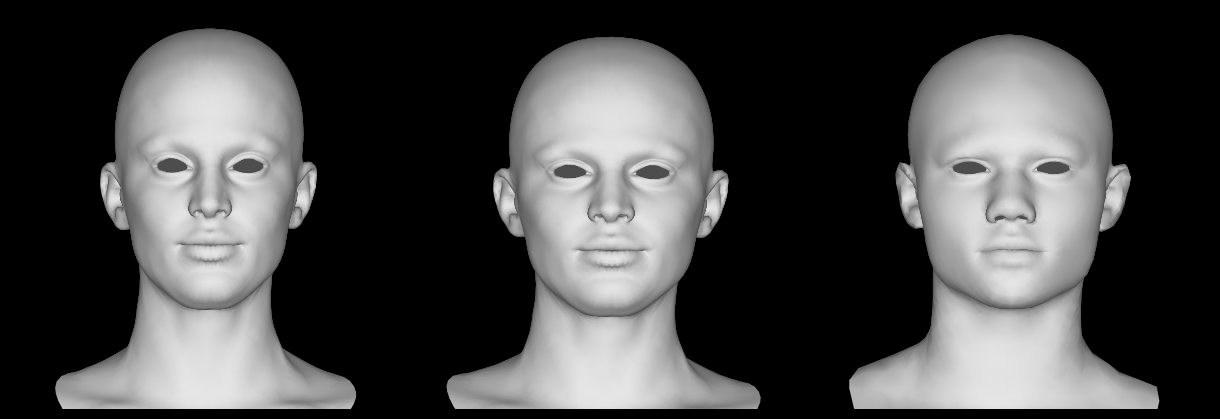

In [7]:
def render_shortcut(src_mesh,mesh,tgt_mesh):
    mesh_scale = .65
    v_list1=[
            src_mesh.v,
            mesh.v,
            tgt_mesh.v,
        ]
    f_list1=[
            src_mesh.f,
            mesh.f,
            tgt_mesh.f,
        ]
    rot_list=[ [0,0,0] ]*len(v_list1)
    plot_mesh_gouraud(v_list1, f_list1, 
                        # is_diff=True, diff_base=src_mesh.v, #diff_revert=True,
                        mesh_scale=mesh_scale,
                        rot_list=rot_list, size=4, mode='shade')
render_shortcut(src_mesh,mesh,tgt_mesh)

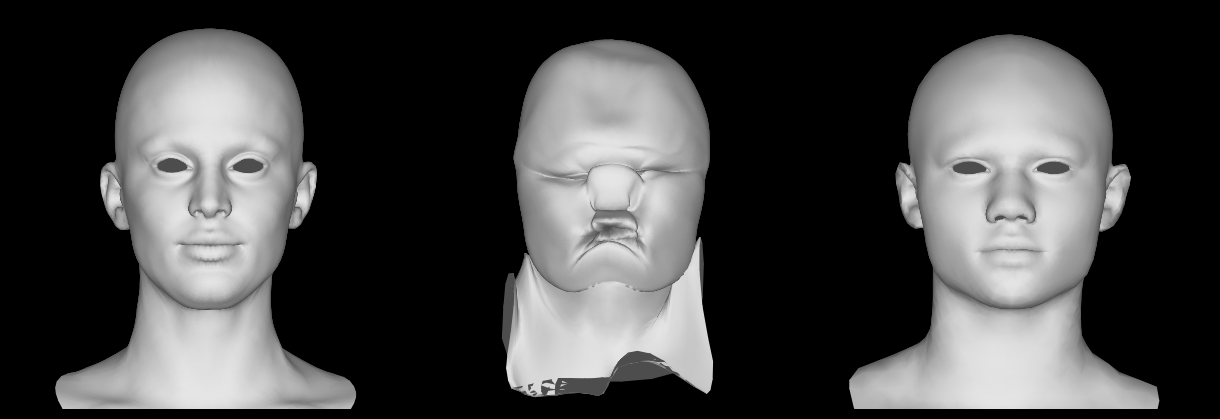

In [ ]:
# mesh = corr_system(mesh, tgt_mesh, src_m, tgt_m, num_iter=1, Ws=1, Wi=0.001, Wc=1660, Wm=1, show=False)
# mesh = corr_system(mesh, tgt_mesh, src_m, tgt_m, num_iter=1, Ws=1, Wi=0.001, Wc=3330, Wm=1, show=False)
# mesh = corr_system(mesh, tgt_mesh, src_m, tgt_m, num_iter=1, Ws=1, Wi=0.001, Wc=5000, Wm=1, show=False)

for wc in np.linspace(1, 5000, 4):
    mesh = corr_system(mesh, tgt_mesh, src_m, tgt_m, num_iter=1, Ws=1, Wi=0.001, Wc=wc, Wm=1, show=False, mode=2)
    render_shortcut(src_mesh,mesh,tgt_mesh)

In [16]:
np.linspace(1, 5000, 4)

array([1.00000000e+00, 1.66733333e+03, 3.33366667e+03, 5.00000000e+03])

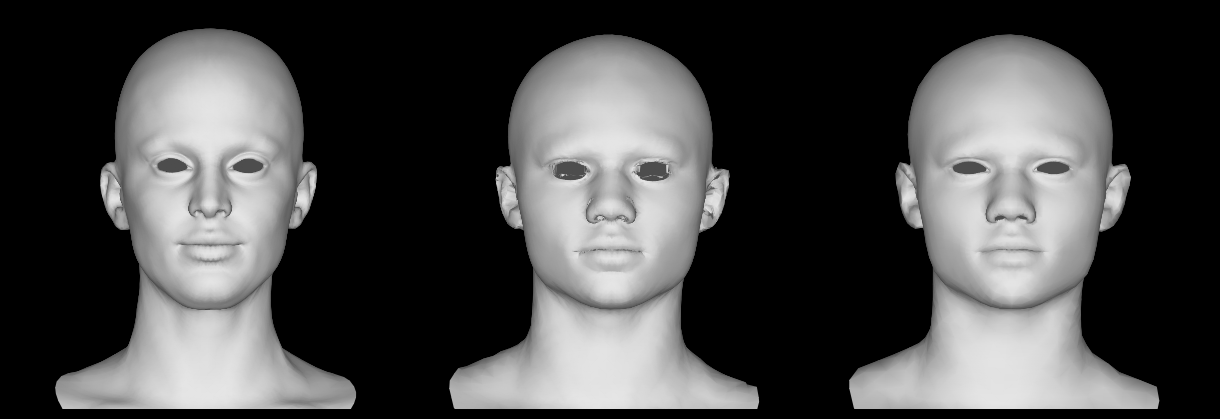

In [11]:
k=10
# closest_pts0 = find_closest_valid_points(V_src=mesh.v, F_src=mesh.f, V_tar=tgt_mesh.v, F_tar=tgt_mesh.f, normal_weight=0.0, k=k)
# closest_pts1 = find_closest_valid_points(V_src=mesh.v, F_src=mesh.f, V_tar=tgt_mesh.v, F_tar=tgt_mesh.f, normal_weight=0.5, k=k)
# closest_pts2 = find_closest_valid_points(V_src=mesh.v, F_src=mesh.f, V_tar=tgt_mesh.v, F_tar=tgt_mesh.f, normal_weight=1, k=k)
# closest_pts.shape
mesh_scale = .65

v_list1=[ 
        # closest_pts0,
        # closest_pts1,
        # closest_pts2,
        src_mesh.v,
        mesh.v,
        tgt_mesh.v,
    ]
f_list1=[ 
        # src_mesh.f,
        # src_mesh.f,
        src_mesh.f,
        mesh.f,
        tgt_mesh.f,
    ]
rot_list=[ [0,0,0] ]*len(v_list1)
plot_mesh_gouraud(v_list1, f_list1, 
                     # is_diff=True, diff_base=src_mesh.v, #diff_revert=True,
                     mesh_scale=mesh_scale,
                     rot_list=rot_list, size=4, mode='shade')

# mean

In [8]:
import numpy as np
from matplotrender import *

mf_id_verts_train = np.load('exp_data/id_verts_train.npy', allow_pickle=True)
mf_id_verts_test = np.load('exp_data/id_verts_test.npy', allow_pickle=True)
mf_id_verts_val = np.load('exp_data/id_verts_val.npy', allow_pickle=True)

mf_all = np.vstack((mf_id_verts_train, mf_id_verts_val, mf_id_verts_test))
mf_all_mean = mf_all.mean(0)

mf_standardization = np.load('exp_data/mf_standardization.npy', allow_pickle=True).item()

print(mf_all_mean.shape)
# k=10
# mesh_scale = .65


(5223, 3)


In [22]:
import pickle

with open('exp_data/biwi_templates_align_deci.pkl', 'rb') as f:
    biwi_templates_align_deci = pickle.load(f)
biwi_all = 0
count = 0
for id_key in biwi_templates_align_deci.keys():
    if id_key == "face":
        continue
    count +=1
    biwi_all+=biwi_templates_align_deci[id_key]
biwi_all /= count

with open('exp_data/voca_templates.pkl', 'rb') as f:
    voca_templates = pickle.load(f)
    
voca_all = 0
count = 0
for id_key in voca_templates.keys():
    if id_key == "face":
        continue
    count +=1
    voca_all+=voca_templates[id_key]
voca_all /= count
    

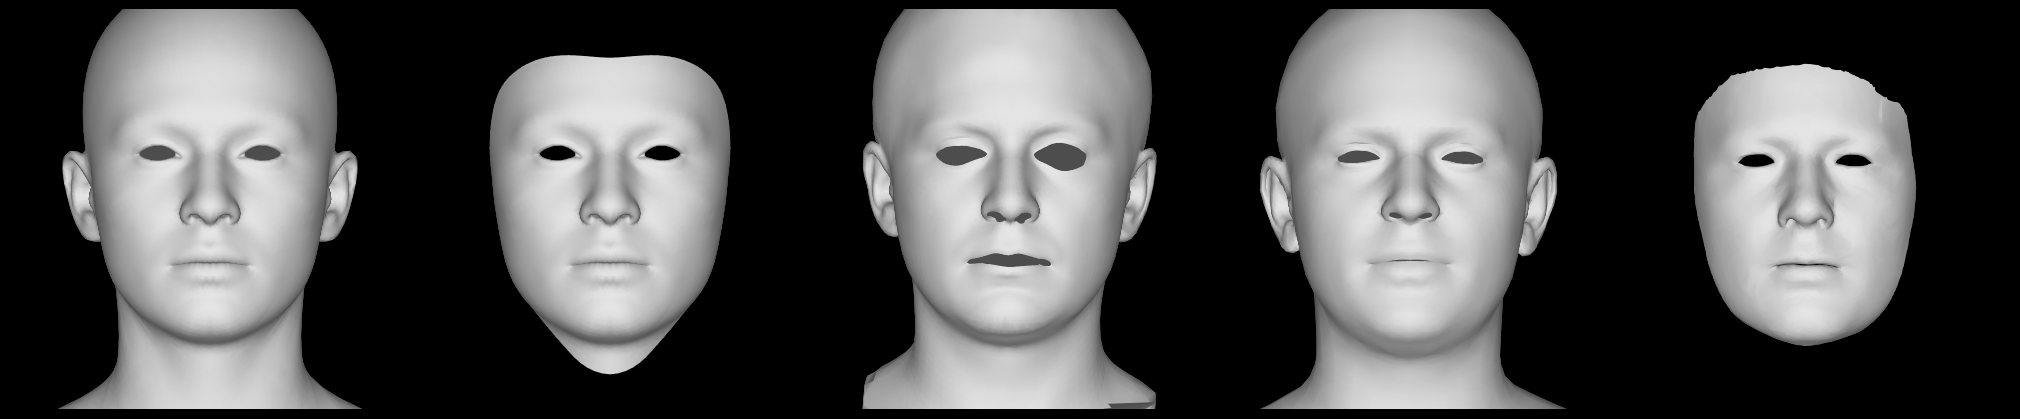

In [23]:
ict = ICT_face_model()
ict_narrow = ICT_face_model(narrow_only=True)
v_list1=[ 
        ict.neutral_verts,
        ict_narrow.neutral_verts,
        mf_all_mean,
        voca_all,
        biwi_all
    ]
f_list1=[
        ict.faces, 
        ict_narrow.faces, 
        mf_standardization["new_f"],
        voca_templates["face"],
        biwi_templates_align_deci["face"]
    ]
rot_list=[ [0,0,0] ]*len(v_list1)
plot_mesh_gouraud(v_list1, f_list1, 
                     # is_diff=True, diff_base=src_mesh.v, #diff_revert=True,
                     mesh_scale=0.8,
                     rot_list=rot_list, size=4, mode='shade')

In [10]:
qwe = trimesh.Trimesh(vertices=mf_all_mean, faces=mf_standardization["new_f"])
_ = qwe.export("multiface_mean_std_mesh.obj")

In [18]:
qwe = trimesh.Trimesh(vertices=ict.neutral_verts, faces=ict.faces)
_ = qwe.export("ict_full_head.obj")

qwe = trimesh.Trimesh(vertices=ict_narrow.neutral_verts, faces=ict_narrow.faces)
_ = qwe.export("ict_narrow_face.obj")

In [24]:
qwe = trimesh.Trimesh(vertices=voca_all, faces=voca_templates["face"],)
_ = qwe.export("voca_templates_mean_std.obj")

qwe = trimesh.Trimesh(vertices=biwi_all, faces=biwi_templates_align_deci["face"])
_ = qwe.export("biwi_templates_align_deci_mean.obj")